┌ Info: Saved animation to /home/jovyan/assignments/homework-3-Sarangi Ganeshalingam/anim1.gif
└ @ Plots /opt/julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/home/jovyan/assignments/homework-3-Sarangi Ganeshalingam/anim1.gif")
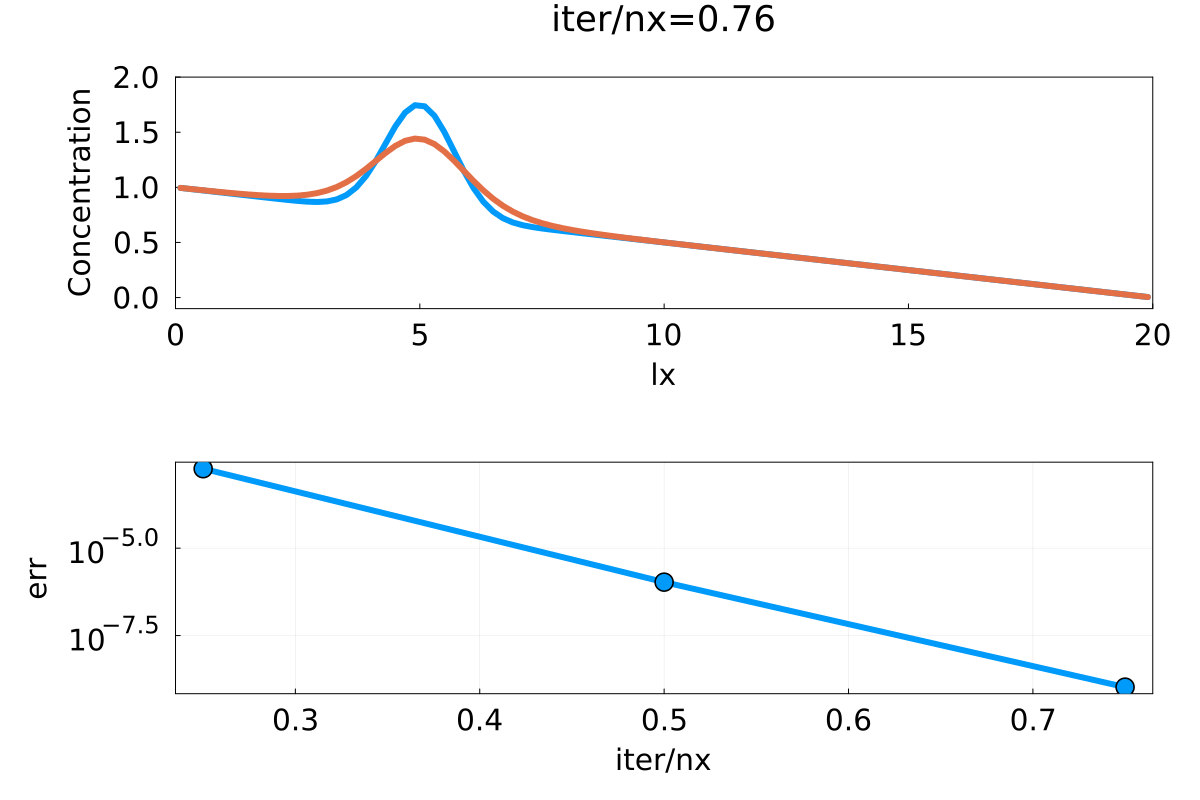

In [2]:
#Task 1
using Plots, Plots.Measures, Printf
default(size=(1200, 800), framestyle=:box, label=false, grid=false, margin=10mm, lw=6, labelfontsize=20, tickfontsize=20, titlefontsize=24)

@views function implicit_diffusion_1D()
    # physics
    lx      = 20.0
    dc      = 1.0
    da      = 1000
    re      = π + sqrt(π^2 + da)
    ρ       = (lx / (dc * re))^2
    dt       = lx^2 / dc / da
    # numerics
    nx      = 100
    ϵtol    = 1e-8
    maxiter = 50nx
    ncheck  = ceil(Int, 0.25nx)
    nt      = 10
    # derived numerics
    dx      = lx / nx
    xc      = LinRange(dx / 2, lx - dx / 2, nx)
    dτ      = dx / sqrt(1 / ρ)
    # array initialisation
    C       = @. 1.0 + exp(-(xc - lx / 4)^2) - xc / lx
    C_i     = copy(C)
    qx      = zeros(Float64, nx - 1)
    C_old   = copy(C)
    # iteration loop
    iter = 1; err = 2ϵtol; iter_evo = Float64[]; err_evo = Float64[]
    anim = @animate for it = 1:nt

        C_old .= C
        iter   = 1; err = 2ϵtol; iter_evo = Float64[]; err_evo = []
        
        while err >= ϵtol && iter <= maxiter
            
            qx         .-= dτ ./ (ρ .+ dτ / dc) .* (qx ./ dc .+ diff(C) ./ dx)
            C[2:end-1] .-= dτ ./ (1.0 .+ dτ / dt) .* ((C[2:end-1] .- C_old[2:end-1]) ./ dt .+ diff(qx) ./ dx)
            
            if iter % ncheck == 0
                err = maximum(abs.(diff(dc .* diff(C) ./ dx) ./ dx .- (C[2:end-1] .- C_old[2:end-1]) ./ dt))
                push!(iter_evo, iter / nx); push!(err_evo, err)

            end
            
        iter += 1
            
        end
            p1 = plot(xc, [C_i, C]; xlims=(0, lx), ylims=(-0.1, 2.0),
                      xlabel="lx", ylabel="Concentration", title="iter/nx=$(round(iter/nx,sigdigits=3))")
            p2 = plot(iter_evo, err_evo; xlabel="iter/nx", ylabel="err",
                      yscale=:log10, grid=true, markershape=:circle, markersize=10)
           plot(p1, p2; layout=(2, 1))
    end
    gif(anim,"anim1.gif";fps=2)
end

implicit_diffusion_1D()

#insert gif into Readme.md with 1/2 sentences